 ***Proyecto 3 - Tapia Ivan Gonzalo***

### El siguiente Trabajo Práctico consiste en completar el notebook para resolver dos problemas de clasificación con Machine Learning Supervisado

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Clasificación Múltiple con 'N' Features:  Regresión Logística con Scikit-Learn


* En este Notebook vamos a resolver un problema de ***Clasificación Múltiple con las Regresión Logística usando la librería de Scikit-Learn*** para el caso en el que tengamos en nuestro Dataset ***más de dos Features (o atributos)***.

*   DataSet: "iris.csv"

* Para resolver el problema de Clasificación vamos a utilizar la clase **"LogisticRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar tres tipos de flores, conociendo los tamaños (alto y ancho) del petalo y sépalo*** de la flor; es decir, que tendremos 4 atributos (o Features).


* Al ser un problema ***de Clasificación múltiple obtenemos tantos modelos como clases tengamos que clasificar***, por lo que para esta caso tendremos que encontrar los parámetros $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$ para ***tres funciones de decisión*** que sean capaces de discernir una clase con el resto:

<span style="font-size:16px">$$Flor\;1 = \beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith$$</span>

<span style="font-size:16px">$$Flor\;2 = \beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith$$</span>

<span style="font-size:16px">$$Flor\;3 = \beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith$$</span>
    
    
* Aplicando estas funciones de decisión a una logística podremos saber la probabilidad de pertenencia de cada flor a cada una de las clases de la siguiente manera:

<span style="font-size:16px">$$P(Y=Flor\;1|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith)}}$$</span>

<span style="font-size:16px">$$P(Y=Flor\;2|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith)}}$$</span>

<span style="font-size:16px">$$P(Y=Flor\;3|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith)}}$$</span>
    

* ***Daremos como predicción para una nueva flor, aquella clase que mayor probabilidad dé***.


* Para resolver este problema vamos a realizar los siguientes pasos:

    1. [Carga de datos](#M1)

    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)

    3. [Visualización de los datos](#M3)

    4. [Creacción del modelo (hipótesis) y ajuste](#M4)

    5. [Obtención del modelo (hipótesis)](#M5)

    6. [Cálculo de predicción](#M6)

    7. [Graficar Matriz de confusión](#M7)


* En primer lugar vamos a importar las librería necesarias:



In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path de la carpeta donde tenemos los datos
ruta = '/content/drive/MyDrive/Proyecto3/Data/'

### 1. Carga de datos


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo
    - ***petal_length***: El "largo" del Pétalo
    - ***petal_width***: El "ancho" del Pétalo
    


In [ ]:
# Carga de datos
df = pd.read_csv(ruta + "iris.csv")
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
95,5.7,3.0,4.2,1.2,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor


### <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***).
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***.
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números, siendo esta transformación:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***

In [ ]:
# Estructura de datos a numpy

X = df[['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                                                 # Obtengo las etiquetas

# Transformación de las etiquetas a números
le = preprocessing.LabelEncoder()          # Instancio un objeto de la clase LabelEncoder() labelencoder es pasar los tituos de los labels a numeros
y = le.fit_transform(y_labels)             # Transformo las etiquetas a números(utilizo esa instancia para hacer la transformacion de datos(categorias) a numeros)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### <a name="M3">3. Visualización de los datos</a>


* A continuación vamos a ver la relación que hay entre cada par de atributos de los tres tipos de flores.

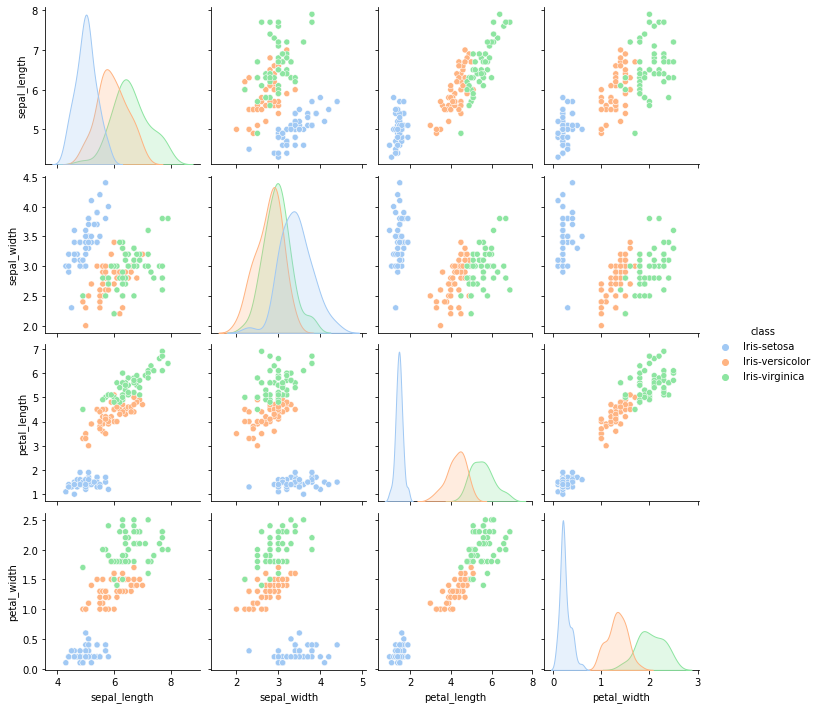

In [ ]:
# usar de seaborn la función pairplot
sns.pairplot(hue = 'class' ,data = df, palette = 'pastel')

### <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [ ]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros

logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50) #liblinear me define una linea como frontera

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor

logreg.fit(X_train, y_train)


LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

### <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos devuelve en una matriz los parámetros del $\beta_1$ al $\beta_n$ para cada una de las funciones de decisión.
<span></span><br><br>
    - ***intercept_***: Nos devuelve una lista con los parámetros ***$\beta_0$*** para cada una de las funciones de decisión.
    

* Obteniendo estos valores podemos obtener el modelo generado:

In [ ]:
# Obtención del modelo

b0 = logreg.intercept_  #b0 son los valores que no van acompañados de variables (en este caso es el tipo de flor)

b = logreg.coef_        #los coef van acompañado de valores (en este caso son las caracteristicas de los petalos y sepalos)
# Mostrarlo (print)


print("\nIris-setosa: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1], b3=b[0,2], b4=b[0,3]))

print("\nIris-versicolor: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[1], b1=b[1,0], b2=b[1,1], b3=b[1,2], b4=b[1,3]))

print("\nIris-virginica: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[2], b1=b[2,0], b2=b[2,1], b3=b[2,2], b4=b[2,3]))



Iris-setosa: Z = 0.25 + 0.40 · sepal_length + 1.37 · sepal_width + -2.16 · petal_length + -1.02 · petal_width

Iris-versicolor: Z = 0.85 + 0.42 · sepal_length + -1.48 · sepal_width + 0.45 · petal_length + -1.05 · petal_width

Iris-virginica: Z = -1.03 + -1.62 · sepal_length + -1.45 · sepal_width + 2.37 · petal_length + 2.24 · petal_width


### <a name="M6">6. Cálculo de Predicción</a>


* A continuación vamos a ver como predecir la clase de una Flor usando la librería de Scikit con el método ".predict(flor)" y como obtener esa misma predicción aplicando del modelo obtenido.


* Para ello seleccionemos una flor del Dataset, que para este ejemplo vamos a seleccionar la flor:
    - Class: Iris-Setosa
    - Sepal_lenght: 4.9
    - Sepal_With: 3.0
    - Petal_lenght: 1.4
    - Petal_With: 0.2


In [ ]:
# Valores de X y Y (X[n], Y[n])

X_flor = X[1]
y_flor = y[1]

print('Flor : X={} - y={} - Clase = {}'.format(X_flor, y_flor, le.inverse_transform([y_flor])))


Flor : X=[4.9 3.  1.4 0.2] - y=0 - Clase = ['Iris-setosa']


* A continuación vamos a ver cual es la predicción que nos devuelve Scikit-Learn.


* Vamos también cuales son los parámetros de la función de decisión y cual es el resultado de esa función de decisión para cada clase:

In [ ]:
# Predicción y función de decisión

prediccion = logreg.predict(X_test)   #uso la funcion predict
probabilidades = logreg.decision_function([X_flor]) #aca obtengo los porcentajes que me interesan para saber a que tipo de flor mas se asemeja

print('Predicción -> Pertenece a la clase {}'.format(prediccion))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(prediccion)))
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(probabilidades[0,0], probabilidades[0,1], probabilidades[0,2]))

Predicción -> Pertenece a la clase [0 0 0 1 0 0 1 2 0 1 1 0 1 0 2 2 0 1 2 2 2 2 2 2 1 2 1 2 0 2]
Predicción Etiquetada -> Pertenece a la clase ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica']
Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 3.12
	Iris-Versicolor: -1.13
	Iris-Virginica: -9.52


* A continuación vamos a calcular la función de decisión de esa flor para cada clase usando el modelo y posteriormente la probabilidad de pertenencia a cada clase:

In [ ]:
import math #importo math para calcular las probabilidades
# Obtenemos los parámetros
b0 = logreg.intercept_
b = logreg.coef_


# Función de decisión
z_setosa = b0[0] + (b[0,0] * X_flor[0]) + (b[0,1] * X_flor[1]) + (b[0,2] * X_flor[2]) + (b[0,3] * X_flor[3]) 
z_versicolor = b0[1] + (b[1,0] * X_flor[0]) + (b[1,1] * X_flor[1]) + (b[1,2] * X_flor[2]) + (b[1,3] * X_flor[3])
z_virginica = b0[2] + (b[2,0] * X_flor[0]) + (b[2,1] * X_flor[1]) + (b[2,2] * X_flor[2]) + (b[2,3] * X_flor[3])

# Imprimimos las funciones de decisión

print('Funcion de decisión: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(z_setosa, z_versicolor, z_virginica))


# Calculamos las probabilidades

prob_setosa = 1 / (1 + math.exp(-1 * (z_setosa)))
prob_versicolor = 1 / (1 + math.exp(-1 * (z_versicolor)))
prob_virginica = 1 / (1 + math.exp(-1 * (z_virginica)))

# Imprimimos las probabilidades

print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(prob_setosa, prob_versicolor, prob_virginica))


Funcion de decisión: 
	Iris-Setosa: 3.12
	Iris-Versicolor: -1.13
	Iris-Virginica: -9.52
Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 0.96
	Iris-Versicolor: 0.24
	Iris-Virginica: 0.00


* Veamos como realizamos esos cálculos con detalle:

In [ ]:
# Imprimimos por pantalla la información de cada cálculo
print('\nIris-Setosa ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[0], b[0,0], X_flor[0], b[0,1], X_flor[1], b[0,2], X_flor[2], b[0,3], X_flor[3], z_setosa))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_setosa, 1 / (1 + math.exp(-1 * z_setosa))))


print('\nIris-Versicolor ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[1], b[1,0], X_flor[0], b[1,1], X_flor[1],b[1,2], X_flor[2], b[1,3], X_flor[3], z_versicolor))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_versicolor, 1 / (1 + math.exp(-1 * z_versicolor))))


print('\nIris-Virginica ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[2], b[2,0], X_flor[0], b[2,1], X_flor[0],b[2,2], X_flor[2], b[2,3], X_flor[3], z_virginica))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_virginica, 1 / (1 + math.exp(-1 * z_virginica))))




Iris-Setosa 
  Z =  0.25 + 0.40·4.90 + 1.37·3.00 + -2.16·1.40 + -1.02·0.20 = 3.12
  g(Z) =  1 / 1 + e^-(3.12) = 0.96

Iris-Versicolor 
  Z =  0.85 + 0.42·4.90 + -1.48·3.00 + 0.45·1.40 + -1.05·0.20 = -1.13
  g(Z) =  1 / 1 + e^-(-1.13) = 0.24

Iris-Virginica 
  Z =  -1.03 + -1.62·4.90 + -1.45·4.90 + 2.37·1.40 + 2.24·0.20 = -9.52
  g(Z) =  1 / 1 + e^-(-9.52) = 0.00


### <a name="M7">7. Matriz de confusión</a>


* Finalmente, calculamos y graficamos la matriz de confusión

In [ ]:
# Métricas con y_test y y_predict

y_predict = logreg.predict(X_test)

# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_predict)) #esta función me da un resumen de las probabilidades de acierto de mi clasificador



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



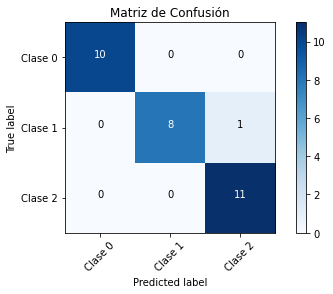

In [ ]:
# Matriz de confusión
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline
#esta es la funcion que dibuja la matriz de confusion (ya se puede importar directamente from sklearn.metrics import plot_confusion_matrix(clasificador, X_test, y_test) 
#y le paso como como parametros el clasificador, X_test, y_test), lo hice en el ejercicio 2
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[0, 1, 2])
plot_confusion_matrix(matriz_confusion, classes=['Clase 0', 'Clase 1', 'Clase 2'], title='Matriz de Confusión')
plt.show()


# 2. Clasificación de pacientes con enfermedades coronarias

* El objetivo de este ejercicio es el de obtener un modelo capaz de predecir si un paciente tiene o no una enfermedad coronaria.

*   **DataSet**: "heart_disease.csv"

* Sobre el Dataset se tienen las siguientes características:

    - age: Edad en años
    - sex: (1 = hombre; 0 = mujer)
    - cp: Tipo de dolor en el pecho
    - trestbps: Presión arterial
    - chol: Colesterol
    - fbs: (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
    - restecg: Resultados electrocardiográficos en reposo
    - thalach: Frecuencia cardíaca máxima alcanzada
    - exang: Angina inducida por ejercicio (1 = sí; 0 = no)
    - oldpeak: Depresión del ST inducida por el ejercicio relativo al descanso
    - slope: Pendiente del segmento pico del ejercicio ST
    - ca: Número de vasos principales (0-3) coloreados por flourosopía
    - thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
    - target: 1 = Enfermo, 0 = Sano


* En este ejercicio se le pide que genere un modelo que sea capaz de **clasificar** a un paciente indicando si sufre o no una enfermendad coronaria.

* Para ello hay que tomar las variables de entrada que se consideren y como variable de salida el target.

* Para resolver este problema vamos a realizar los siguientes pasos:

    1. Carga de datos 
    2. ***Visualización de los datos***, de esta manera podremos seleccionar las variables que consideremos más relevantes visualmente.
    3. ***Cambio de estructura de datos a numpy y transformación de las etiquetas***.
    4. ***Creacción del modelo (hipótesis) y ajuste***.
    5. ***Obtención del modelo (hipótesis)***.
    6. ***Acierto del Modelo***. Obtener el porcentaje de acierto del modelo.
    7. Matriz de confusión

##SETUP

In [ ]:
# Importo librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
# Leo los datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path de la carpeta donde tengo los datos
ruta = '/content/drive/MyDrive/Proyecto3/Data/'

##1. Carga de datos

In [ ]:
# Carga de datos
df2 = pd.read_csv(ruta + "heart_disease.csv")
df2.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0


##2. Visualización de los datos, de esta manera podremos seleccionar las variables que consideremos más relevantes visualmente.

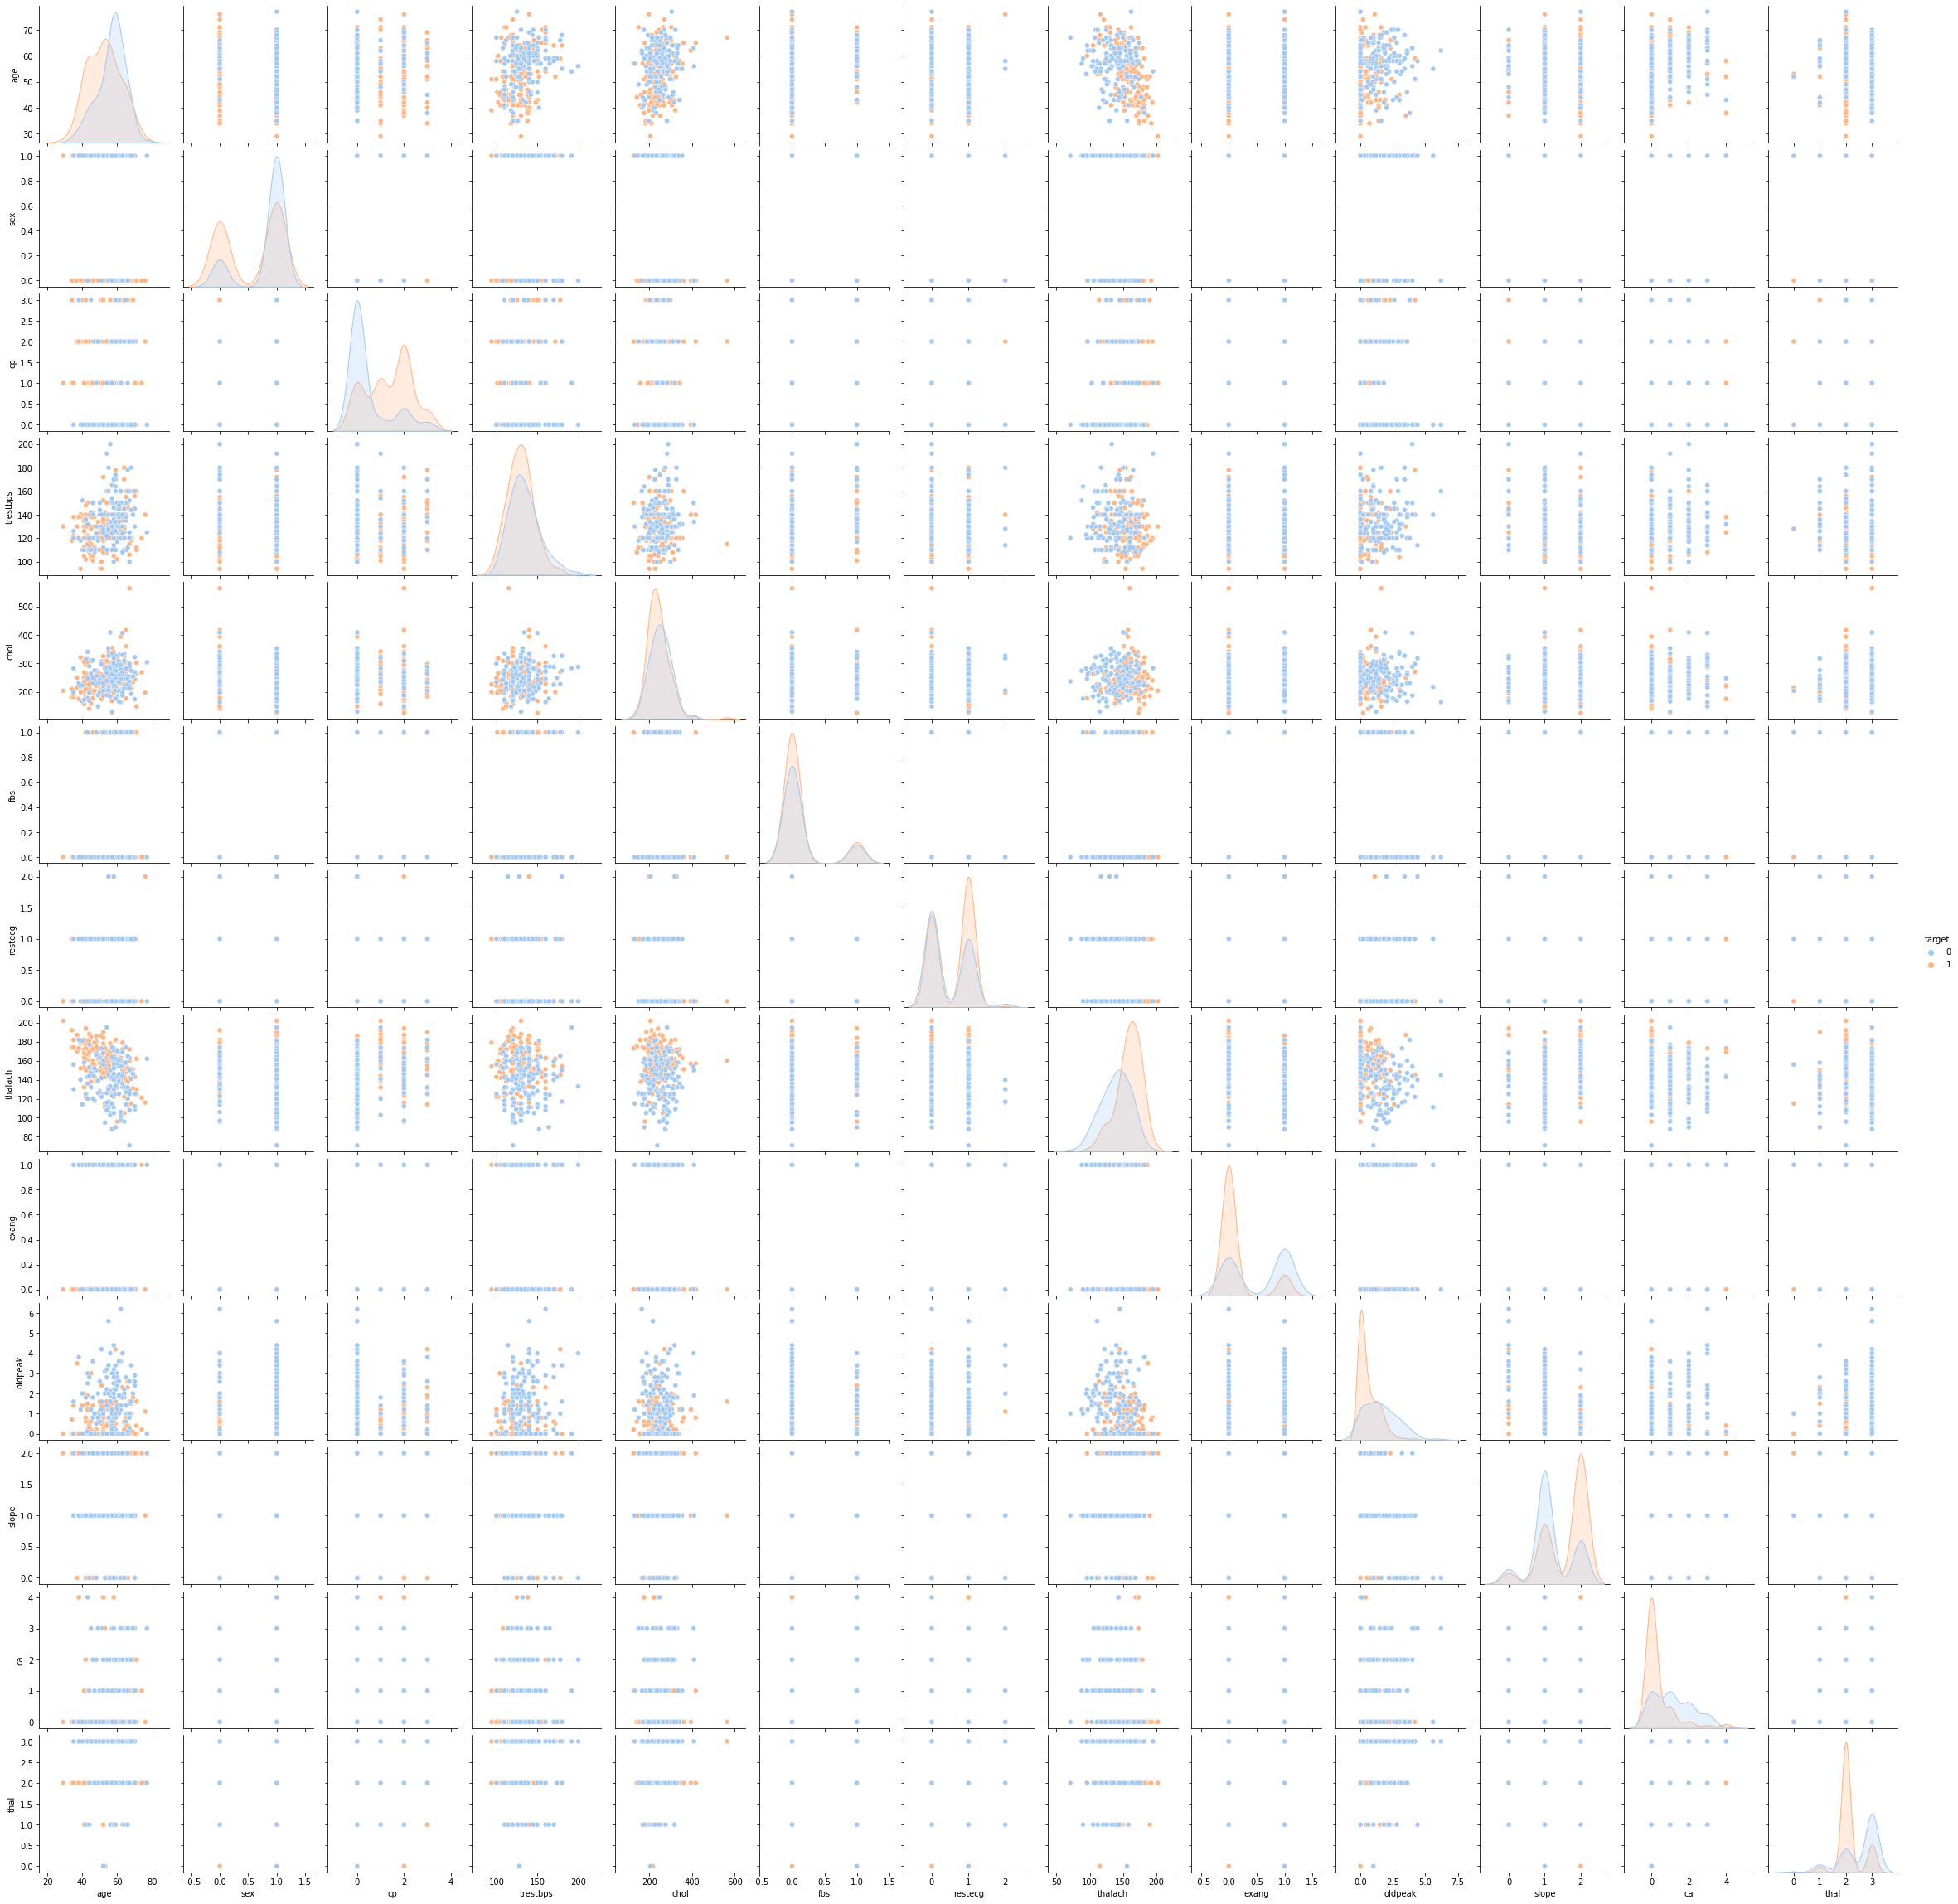

In [ ]:
sns.pairplot(hue = 'target' ,data = df2, palette = 'pastel')

In [ ]:
#Tambien grafico con plotly 
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_matrix(df2,
    dimensions=['age',	'sex',	'cp',	'trestbps',	'chol'	,'fbs',	'restecg',	'thalach',	'exang'	,'oldpeak',	'slope'	,'ca'	,'thal'],
    color="target",
    range_color = [0,1],
    width = 1500,
    height = 1000,
    title = 'Visualización de datos',  
    opacity = 0.5)
fig.show()

##3.Cambio de estructura de datos a numpy y transformación de las etiquetas.

In [ ]:
#AL FINAL NO USE ESTO PORQUE ME DABA UN ERROR MAS ADELANTE
# # Estructura de datos a numpy

# X = df2[['age', 'sex', 'thalach', 'thal', 'cp', 'ca', 'chol', 'exang', 'oldpeak']].values   # Obtengo los datos que mas me interesaron
# y_labels = df2['target'].values                                               # Obtengo los targets

# # Transformación de las etiquetas a números
# le = preprocessing.LabelEncoder()          # Instancio un objeto de la clase LabelEncoder() labelencoder es pasar los tituos de los labels a numeros
# y = le.fit_transform(y_labels)             # Transformo las etiquetas a números(utilizo esa instancia para hacer la transformacion de datos(categorias) a numeros)
# #y_invert = np.flip(y)
# y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Resuelvo el preprocesamiento de otra forma
columnas_categoricas = ['target'] #voy a guardar en esta variable mi columna de salida

In [ ]:
data_final = pd.get_dummies(df2, columns=columnas_categoricas, drop_first = True) #paso a dummies el target esto creo que no era necesario, pero sirve para pasar a binario cuando hay opciones como yes or no
data_final.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target_1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0


In [ ]:
#SEPARO LAS VARIABLES PREDICTORAS (X) de la predicha (y)
#obtengo las X con las variables que a mi me interesaron 
X = data_final[['age', 'sex', 'thalach', 'thal', 'cp', 'ca', 'chol', 'exang', 'oldpeak']] #Subdata, uso estos argumentos por las conclusiones que saque de la inspección visual de los datos
X.sample(5)

,age,sex,thalach,thal,cp,ca,chol,exang,oldpeak
130,54,0,163,2,2,1,201,0,0.0
174,60,1,132,3,0,2,206,1,2.4
175,40,1,114,3,0,0,167,1,2.0
242,64,1,132,1,0,2,212,0,2.0
241,59,0,143,2,0,0,249,1,0.0


In [ ]:
#Y es mi target salida
y = data_final[['target_1']]  #estas son las y ya predichas
y.sample(5)

,target_1
53,1
33,1
86,1
261,0
189,0


In [ ]:
# divido los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.sample(5) #veo mis datos de entrenamiento

,age,sex,thalach,thal,cp,ca,chol,exang,oldpeak
284,61,1,138,3,0,1,207,1,1.9
209,59,1,162,3,0,1,177,1,0.0
171,48,1,168,3,1,0,229,0,1.0
8,52,1,162,3,2,0,199,0,0.5
197,67,1,163,3,0,2,254,0,0.2


In [ ]:
X_test.head()  #veo mis datos de testeo

,age,sex,thalach,thal,cp,ca,chol,exang,oldpeak
186,60,1,144,3,0,1,253,1,1.4
291,58,1,140,1,0,3,318,0,4.4
122,41,0,172,2,2,0,268,1,0.0
183,58,1,165,3,2,1,230,0,2.5
259,38,1,182,3,3,0,231,1,3.8


In [ ]:
y_train.sample(5) #veo mis y predichas de entrenamiento

,target_1
121,1
213,0
277,0
61,1
170,0


In [ ]:
y_test.sample(5)  #veo las y de testeo

,target_1
91,1
194,0
152,1
287,0
7,1


##4 y 5. Creacion del modelo(hipótesis) y ajuste - Obtencion del modelo(hipótesis). Voy a utilizar 2 clasificadores (LogisticRegression, DecisionTreeClassifier y KNeighborsClassifier) y voy a elegir al que mejor porcentaje de acierto me dé

In [ ]:
#MODELAMIENTO por mi cuenta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix    #lo voy a usar para hacer mi matriz de confusion
from sklearn.metrics import classification_report #lo voy a usar para ver los aciertos
from sklearn.metrics import accuracy_score      #lo uso para ver el accuracy
from sklearn.metrics import plot_confusion_matrix #lo voy a usar para printear mi matriz de confusion

###LogisticRegression(), lo voy a llamar clasificador

In [ ]:
#creo un objeto de la clase LogisticRegression para poder entrenar el modelo
clasificador = LogisticRegression() #creo el objeto de LogisticRegression

In [ ]:
#entreno el modelo 
clasificador.fit(X_train, y_train)  #ajusto el modelo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Voy a predecir y los resultados los voy a guardar en la variable y_pred
y_pred = clasificador.predict(X_test) #importante VOY A UTILIZAR MI X_TEST que son datos que el algoritmo no conoce(hago la predicción y los guardo en esta variable)
y_pred  

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=uint8)

In [ ]:
#veo el score del clasificador logisticregression
clasificador.score(X_test, y_test)

0.8360655737704918

In [ ]:
#Veo el reporte de classificacion 
print(classification_report(y_true=y_test, y_pred=y_pred))
#ACA PUEDO VER CLARAMENTE QUE ESTE CLASIFICADOR FUNCIONA MEJOR PARA ESTE CASO ESPECIFICO

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



###DecisionTreeClassifier, lo voy a llamar clasificador2

In [ ]:
#DecisionTreeClassifier voy a probar otro tipo de clasificador

from sklearn.tree import DecisionTreeClassifier

clasificador2 = DecisionTreeClassifier()  #creo un objeto dtc

clasificador2.fit(X = X_train, y = y_train) #ajusto el modelo

DecisionTreeClassifier()

In [ ]:
#Utilizo la funcion predict para predecir, con los datos de test (X_test), las predicciones las voy a guardar en la variable y_pred2
y_pred2 = clasificador2.predict(X_test) #hago la predicción y guardo los datos en la variable y_pred2
y_pred2

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
#Veo el score del clasificador decicisiontree (en mi modelo el clasificador logisticregression es mejor)
clasificador2.score(X_test, y_test)

0.6721311475409836

In [ ]:
#veo todo el los detalles score accuracy precision etc con la funcion classification_report()
print(classification_report(y_true=y_test, y_pred=y_pred2))

              precision    recall  f1-score   support

           0       0.59      0.64      0.62        25
           1       0.74      0.69      0.71        36

    accuracy                           0.67        61
   macro avg       0.66      0.67      0.66        61
weighted avg       0.68      0.67      0.67        61



### KNeighborsClassifier, lo voy a llamar clasificador3
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#K neighbors otro tipo de clasificador
from sklearn.neighbors import KNeighborsClassifier

clasificador3 = KNeighborsClassifier()  #creo el clasificador

clasificador3.fit(X = X_train, y = y_train) #ajusto/entreno el modelo

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
#Utilizo la funcion predict para predecir, con los datos de test (X_test), las predicciones las voy a guardar en la variable y_pred3
y_pred3 = clasificador3.predict(X_test) #guardo las predicciones de este modelo en la variable y_pred3
y_pred3

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
#Veo el score del clasificador decicisiontree (en mi modelo el clasificador logisticregression es mejor)
clasificador3.score(X_test, y_test)

0.6065573770491803

In [ ]:
#veo todo el los detalles score accuracy precision etc con la funcion classification_report()
print(classification_report(y_true=y_test, y_pred=y_pred3)) #observo que los resultados no son tan buenos

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        28
           1       0.64      0.64      0.64        33

    accuracy                           0.61        61
   macro avg       0.60      0.60      0.60        61
weighted avg       0.61      0.61      0.61        61



### asi no me salio el punto 5, hice punto 4 y 5 juntos en el mismo enunciado 


In [ ]:
# # NO ME SALIO EL ENUNCIADO DE ESTA MANERA (lo resolví más adelante)
# # Obtención del modelo

# b0 = clasificador.intercept_[0] #b0 son los valores que no van acompañados de variables
# b = clasificador.coef_ 
# b1 = clasificador.coef_[0,0]
# b2 = clasificador.coef_[0,1]
# b3 = clasificador.coef_[0,2]
# b4 = clasificador.coef_[0,3]
# b5 = clasificador.coef_[0,4]
# b6 = clasificador.coef_[0,5]
# b7 = clasificador.coef_[0,6]
# b8 = clasificador.coef_[0,7]
# b9 = clasificador.coef_[0,8]


# # Mostrarlo (print)

# print("\Z = {b0:0.2f} + {b1:0.2f} · age + {b2:0.2f} · sex + {b3:0.2f} · thalach + {b4:0.2f} · thal + {b5:0.2f} · cp + {b6:0.2f} · ca + {b7:0.2f} · chol + {b8:0.2f} · exang + {b9:0.2f} · oldpeak ".format(b0=b0[0], b1=b[0,0], b2=b[0,1], b3=b[0,2], b4=b[0,3], b5=b[0,4], b6=b[0,5], b7=b[0,6], b8=b[0,7], b9=b[0,8]))


# print("\ntarget1: Z = {b0:0.2f} + {b1:0.2f} · age + {b2:0.2f} · sex + {b3:0.2f} · thalach + {b4:0.2f} · thal + {b5:0.2f} · cp + {b6:0.2f} · ca + {b7:0.2f} · chol + {b8:0.2f} · exang + {b9:0.2f} · oldpeak".format(b0=b0[1], b1=b[1,0], b2=b[1,1], b3=b[1,2], b4=b[1,3], b5=b[1,4], b6=b[1,5], b7=b[1,6], b8=b[1,7], b9=b[1,8]))

# print(f'b: {b} ')
# print(f'b0: {b0}')



AttributeError: ignored

In [ ]:
clasificador.predict(X_test) #predecir

In [ ]:
clasificador.score(X_test,y_test) #evaluar

0.8360655737704918

In [ ]:
# no me anduvo
# X_persona = X_train[1]
# y_persona = y[1]
# #print('Persona : X={} - y={} - Clase = {}'.format(X_persona, y_persona, le.inverse_transform([y_persona])))

KeyError: ignored

In [ ]:
# Predicción y función de decisión

# prediccion = clasificador.predict(X_test)   #uso la funcion predict
# probabilidades = clasificador.decision_function([X_persona]) #aca obtengo los porcentajes que me interesan para saber 

# print('Predicción -> Pertenece a la clase {}'.format(y_pred))
# print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(y_pred)))
# print('Probabilidad de pertenencia a cada clase: ' + \
#       '\n\tEnfermo: {:0.2f}\n\tNo enfermo: {:0.2f}' \
#      .format(probabilidades[0,0], probabilidades[0,1]))

NameError: ignored

In [ ]:
#INTENTANDO HACERLO DE NUEVO

###5. Obtención del modelo hipótesis (al final lo pude hacer bien)

In [ ]:
b0 = clasificador.intercept_  #b0 son los valores que no van acompañados de variables 

b = clasificador.coef_        #los coef van acompañados de valores (son las columnas que elegí, en este caso elegí 9 variables)

# Mostrarlo (print)

print("Z = {b0:0.2f} + {b1:0.2f} · age + {b2:0.2f} · sex + {b3:0.2f} · thalach + {b4:0.2f} · thal + {b5:0.2f} · cp + {b6:0.2f} · ca + {b7:0.2f} · chol + {b8:0.2f} · exang + {b9:0.2f} · oldpeak "
      .format(b0=b0[0], b1=b[0,0], b2=b[0,1], b3=b[0,2], b4=b[0,3], b5=b[0,4], b6=b[0,5], b7=b[0,6], b8=b[0,7], b9=b[0,8]))


Z = 0.13 + -0.00 · age + -1.55 · sex + 0.03 · thalach + -0.77 · thal + 0.68 · cp + -0.57 · ca + -0.00 · chol + -1.09 · exang + -0.64 · oldpeak 


##6. Acierto del modelo. Obtener el porcentaje de acierto del modelo.

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred)) #con la funcion classification_report() obtengo un resumen de todos #en este caso veo los aciertos del clasificador que mas porcentaje me dio

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
print('El accuracy de nuestro de modelo de Regresión es: ', accuracy_score(y_pred, y_test)) #veo el accuracy solo

El accuracy de nuestro de modelo de Regresión es:  0.8360655737704918


##7. Matriz de confusión

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


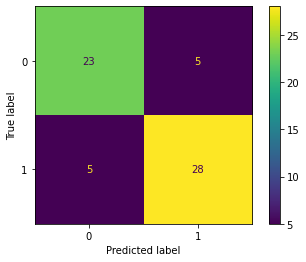

In [ ]:
plot_confusion_matrix(clasificador, X_test, y_test)  #imprimo la matriz de confusión con una sola linea (,cmap=plt.cm.Reds) el argumento cmap es para elegir una gama de colores
#como argumentos le estoy pasando el clasificador, los datos X_test, y los datos y_test

##clasificadores #esto esta de más (es un documento con informacion de otros clasificadores)



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()# Clasificador 
gnb.fit(X_train, y_train) # Entrenar
gnb.predict(X_test) # Predecir
gnb.score(X_test,y_test) # Evaluar

# Árbol de decisiones
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() # Clasificador 
dtc.fit(X_train, y_train) # Entrenar
dtc.predict(X_test) # Predecir
dtc.score(X_test,y_test) # Evaluar

# K-Neighbors (El vecino mas cercano)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7) # Clasificador (n_neighbors = número de vecinos)
knn.fit(X_train, y_train) # Entrenar
knn.predict(X_test) # Predecir
knn.score(X_test,y_test) # Evaluar

# Máquina de vectores de soporte (SVM)
from sklearn.svm import SVC

svc = SVC(kernel='linear') # Clasificador 
svc.fit(X_train, y_train) # Entrenar
svc.predict(X_test) # Predecir
svc.score(X_test,y_test) # Evaluar

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() # Clasificador 
rfc.fit(X_train, y_train) # Entrenar
rfc.predict(X_test) # Predecir
rfc.score(X_test,y_test) # Evaluar